## 0.An end to end Scikit-Learn Workflow

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 1.Getting our data ready to be used with machine learning

Three main things we have to do
* Split the data into features and labels (Usually 'X' & 'Y')
* Filling( also called imputing) or disregarding missing values
* Converting non-numerical values to numerical values(also called feature encoding)

In [41]:
# Create X (Feature matrix)
X=heart_disease.drop('target',axis=1)

# create Y(Labels)
Y=heart_disease['target']

* For Structured data use the `RandomForestClassifier` for better result
* For Unstructured data use `deep learning or trasfer learning`

In [42]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
# 3.Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [44]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [45]:
X.shape[0]*0.8

242.4

In [46]:
242+61

303

In [47]:
clf.fit(X_train,Y_train);

In [48]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2


In [49]:
# make a prediction
Y_pred=clf.predict(X_test)
Y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [50]:
Y_test

180    0
154    1
111    1
247    0
60     1
      ..
218    0
104    1
301    0
194    0
185    0
Name: target, Length: 61, dtype: int64

In [68]:
# 4. Evaluate the model on the training and test data
clf_single_fold_score=clf.score(X_test,Y_test)
clf_single_fold_score

0.8852459016393442

Evaluating a model using the `scoring` parameter

In [69]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,Y,scoring=None,cv=5) #5 random fold

array([0.83606557, 0.90163934, 0.7704918 , 0.83333333, 0.73333333])

In [71]:
clf_cross_val_score=np.mean(cross_val_score(clf,X,Y,scoring=None,cv=5))
clf_single_fold_score,clf_cross_val_score
# Always pick the cross_val_score beacuase dataset is folded to 
# training and test data randomly 5 times

(0.8852459016393442, 0.8083060109289617)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
classification_report(Y_test,Y_pred)

'              precision    recall  f1-score   support\n\n           0       0.93      0.93      0.93        28\n           1       0.94      0.94      0.94        33\n\n    accuracy                           0.93        61\n   macro avg       0.93      0.93      0.93        61\nweighted avg       0.93      0.93      0.93        61\n'

In [53]:
confusion_matrix(Y_test,Y_pred)

array([[26,  2],
       [ 2, 31]], dtype=int64)

In [54]:
accuracy_score(Y_test,Y_pred)

0.9344262295081968

**Area under the receiver operating characteristic curve(AUC/ROC)**
* Area under curve(AUC)
* ROC curve

**ROC curves are a comparison of a model's true positive & model's false positive rate**
* True Positive=model predict 1 when truth is 1
* False Positive=model predicts 1 when truth is 0
* True negative=model predicts 0 when truth is 0
* False negative=model predicts 0 when truth is 1

In [75]:
from sklearn.metrics import roc_curve
y_probs=clf.predict_proba(X_test)
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.06666667, 0.92222222, 0.63333333, 0.52222222, 0.8       ,
       0.85555556, 0.71111111, 1.        , 0.25555556, 0.61111111])

In [76]:
# Calculate fpr,tpr & thresholds
fpr,tpr,thresholds=roc_curve(Y_test,y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03571429, 0.03571429,
       0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.10714286,
       0.10714286, 0.28571429, 0.28571429, 0.32142857, 0.32142857,
       0.39285714, 0.46428571, 0.53571429, 0.60714286, 0.71428571,
       0.78571429, 0.85714286, 1.        ])

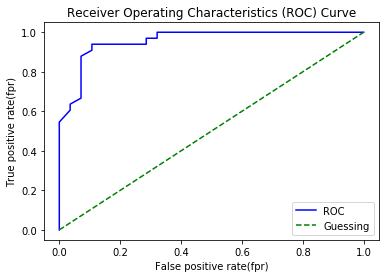

In [89]:
def plot_roc_curve(fpr,tpr):
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, 'b',label='ROC') # blue line
    ax.plot([0,1],[0,1], 'g--',label='Guessing') # green dashed line
    ax.legend()
    plt.xlabel('False positive rate(fpr)')
    plt.ylabel('True positive rate(fpr)')
    plt.title('Receiver Operating Characteristics (ROC) Curve')
plot_roc_curve(fpr,tpr)

In [90]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_probs_positive)

0.9567099567099567

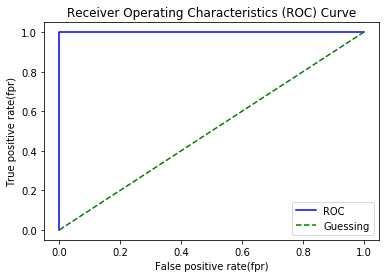

In [92]:
# Plot perfect ROC Curve and AUC score
fpr,tpr,thresholds=roc_curve(Y_test,Y_test)
plot_roc_curve(fpr,tpr)

In [93]:
#Perfect AUC Score
roc_auc_score(Y_test,Y_test)

1.0

In [55]:
# 5.Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,Y_test) * 100}%\n")

Trying model with 10 estimators...
Model accuracy on test set: 86.88524590163934%

Trying model with 20 estimators...
Model accuracy on test set: 86.88524590163934%

Trying model with 30 estimators...
Model accuracy on test set: 88.52459016393442%

Trying model with 40 estimators...
Model accuracy on test set: 88.52459016393442%

Trying model with 50 estimators...
Model accuracy on test set: 90.1639344262295%

Trying model with 60 estimators...
Model accuracy on test set: 90.1639344262295%

Trying model with 70 estimators...
Model accuracy on test set: 91.80327868852459%

Trying model with 80 estimators...
Model accuracy on test set: 90.1639344262295%

Trying model with 90 estimators...
Model accuracy on test set: 88.52459016393442%



In [56]:
# 6.Save a model and load it
import pickle
pickle.dump(clf,open("rand_forest_model_1.pkl","wb"))

In [57]:
loaded_model=pickle.load(open("rand_forest_model_1.pkl","rb"))
loaded_model.score(X_test,Y_test)

0.8852459016393442

### Let's choose another model for classification

In [58]:
from sklearn.svm import LinearSVC
np.random.seed(42)
svc=LinearSVC(max_iter=10000)
svc.fit(X_train,Y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [59]:
svc.score(X_test,Y_test)

0.8852459016393442

In [60]:
clf.score(X_test,Y_test) # RandomForest

0.8852459016393442

In [61]:
# Another way of predictions by Comparing to truth labels to-
#evaluate a model
y_preds=svc.predict(X_test)
np.mean(y_preds==Y_test)

0.8852459016393442

Make Predictions with `predict_proba()` for each test samples

In [63]:
# predict_proba() returns probabilities of classification label
clf.predict_proba(X_test[:5]) # [Not Heart_disease,heart_disease]

array([[0.93333333, 0.06666667],
       [0.07777778, 0.92222222],
       [0.36666667, 0.63333333],
       [0.47777778, 0.52222222],
       [0.2       , 0.8       ]])

In [65]:
clf.predict(X_test[:5])
#1st sample has probability of not heart_disease is=0.93
#2ns sample has prob of having heart_disease is=0.92

array([0, 1, 1, 1, 1], dtype=int64)